In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('E:\\mushrooms.csv', encoding='latin1')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# data understanding

In [3]:
data.shape

(8124, 23)

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# data preparation

In [7]:
encoded_data = data.replace({
    'class': {'p': 1, 'e': 0},
    'cap-shape': {'b': 0, 'c': 1, 'x': 2, 'f': 3, 'k': 4, 's': 5},
    'cap-surface': {'f': 0, 'g': 1, 'y': 2, 's': 3},
    'cap-color': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9},
    'bruises': {'t': 1, 'f': 0},
    'odor': {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8},
    'gill-attachment': {'a': 0, 'd': 1, 'f': 2, 'n': 3},
    'gill-spacing': {'c': 0, 'w': 1, 'd': 2},
    'gill-size': {'b': 0, 'n': 1},
    'gill-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'g': 4, 'r': 5, 'o': 6, 'p': 7, 'u': 8, 'e': 9, 'w': 10, 'y': 11},
    'stalk-shape': {'e': 0, 't': 1},
    'stalk-root': {'b': 0, 'c': 1, 'u': 2, 'e': 3, 'z': 4, 'r': 5, '?': 6},
    'stalk-surface-above-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3},
    'stalk-surface-below-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3},
    'stalk-color-above-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8},
    'stalk-color-below-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8},
    'veil-type': {'p': 0, 'u': 1},
    'veil-color': {'n': 0, 'o': 1, 'w': 2, 'y': 3},
    'ring-number': {'n': 0, 'o': 1, 't': 2},
    'ring-type': {'c': 0, 'e': 1, 'f': 2, 'l': 3, 'n': 4, 'p': 5, 's': 6, 'z': 7},
    'spore-print-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'r': 4, 'o': 5, 'u': 6, 'w': 7, 'y': 8},
    'population': {'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5},
    'habitat': {'g': 0, 'l': 1, 'm': 2, 'p': 3, 'u': 4, 'w': 5, 'd': 6},
})
encoded_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,1,7,2,0,1,0,...,3,7,7,0,2,1,5,0,3,4
1,0,2,3,9,1,0,2,0,0,0,...,3,7,7,0,2,1,5,1,2,0
2,0,0,3,8,1,1,2,0,0,1,...,3,7,7,0,2,1,5,1,2,2
3,1,2,2,8,1,7,2,0,1,1,...,3,7,7,0,2,1,5,0,3,4
4,0,2,3,3,0,6,2,1,0,0,...,3,7,7,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,0,6,0,0,0,11,...,3,4,4,0,1,1,5,2,1,1
8120,0,2,3,0,0,6,0,0,0,11,...,3,4,4,0,0,1,5,2,4,1
8121,0,3,3,0,0,6,0,0,0,1,...,3,4,4,0,1,1,5,2,1,1
8122,1,4,2,0,0,3,2,0,1,2,...,2,7,7,0,2,1,1,7,4,1


In [9]:
encoded_data.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

In [10]:
x = encoded_data.drop(columns=['class', 'stalk-root'])
y= encoded_data['class']

In [11]:
x.shape
y.shape

(8124,)

In [12]:
from sklearn.model_selection import train_test_split
X, x_test, Y, y_test = train_test_split(x,y,test_size=0.2,random_state=42,)
x_train, x_val, y_train, y_val= train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
print("Training, inputs: ", x_train.shape, ", outputs: ", y_train.shape)
print("Testing, inputs: ", x_test.shape, ", outputs: ", y_test.shape)
print("Validation, inputs: ", x_val.shape, ", outputs: ", y_val.shape)

Training, inputs:  (5199, 21) , outputs:  (5199,)
Testing, inputs:  (1625, 21) , outputs:  (1625,)
Validation, inputs:  (1300, 21) , outputs:  (1300,)


# modeling

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scalerMinmax = MinMaxScaler()
X_trainMinmax = scalerMinmax.fit_transform(x_train)
X_testMinmax = scalerMinmax.transform(x_test)
x_valMinmax = scalerMinmax.transform(x_val)
scalerStandard = StandardScaler()
x_trainStandard = scalerStandard.fit_transform(x_train)
x_testStandard = scalerStandard.transform(x_test)
x_valStandard = scalerStandard.transform(x_val)

In [16]:
from sklearn.metrics import accuracy_score
def fit(model, x_train, x_val, y_train, y_val):
    model.fit(x_train, y_train)
    yPredTrain = model.predict(x_train)
    yPredTest = model.predict(x_val)
    trainACC = accuracy_score(y_train, yPredTrain)
    valACC = accuracy_score(y_val, yPredTest)
    return trainACC, valACC

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kValues = [1, 3, 5, 7, 9, 11, 13, 15]

trainingAccuracyValues = []
validationAccuracyValues = []

KNNs = []

for k in kValues:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    KNNs.append(knn)
    
    knnTrainACC, knnValACC = fit(knn,x_train,x_val,y_train,y_val)
    trainingAccuracyValues.append(knnTrainACC)
    validationAccuracyValues.append(knnValACC)

# evaluation

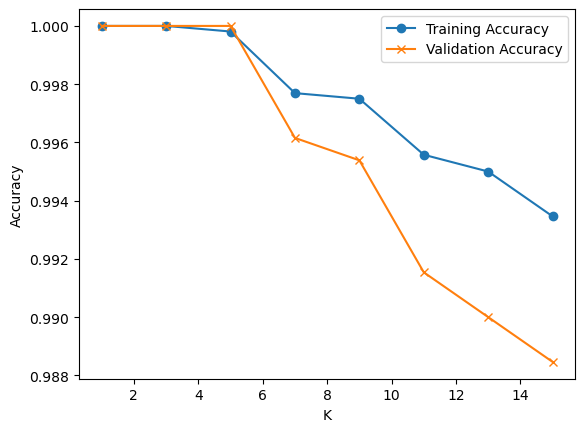

In [24]:
plt.plot(kValues, trainingAccuracyValues, marker='o', label='Training Accuracy')
plt.plot(kValues, validationAccuracyValues, marker='x', label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
yPredTest = KNNs[1].predict(xTest)
testAcc = accuracy_score(yTest, yPredTest)

from sklearn.metrics import classification_report
print(classification_report(yTest, yPredTest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

